In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 7

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
2/2 [==============================] - 2s 2s/step - loss: 2.0937 - accuracy: 0.1139 - val_loss: 1.9844 - val_accuracy: 0.1842

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
2/2 [==============================] - 0s 45ms/step - loss: 2.0380 - accuracy: 0.1554 - val_loss: 1.9758 - val_accuracy: 0.1842

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
2/2 [==============================] - 0s 44ms/step - loss: 2.0281 - accuracy: 0.0987 - val_loss: 1.9682 - val_accuracy: 0.1842

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
2/2 [==============================] - 0s 46ms/step - loss: 2.0008 - accuracy: 0.1669 - val_loss: 1.9611 - val_accuracy: 0.1711

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
2/2 [==============================] - 0s 45ms/step - loss: 2.0020 - accuracy: 0.1187 - val_loss: 1.9

2/2 [==============================] - 0s 45ms/step - loss: 1.8793 - accuracy: 0.2526 - val_loss: 1.8429 - val_accuracy: 0.3553

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.8629 - accuracy: 0.2771 - val_loss: 1.8398 - val_accuracy: 0.3553

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.8435 - accuracy: 0.2960 - val_loss: 1.8368 - val_accuracy: 0.3553

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.8410 - accuracy: 0.2649 - val_loss: 1.8336 - val_accuracy: 0.3684

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.8372 - accuracy: 0.2897 - val_loss: 1.8306 - v

Epoch 75/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.6790 - accuracy: 0.3606 - val_loss: 1.6480 - val_accuracy: 0.4868

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.6747 - accuracy: 0.3417 - val_loss: 1.6408 - val_accuracy: 0.4868

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.7041 - accuracy: 0.2986 - val_loss: 1.6339 - val_accuracy: 0.4868

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.7018 - accuracy: 0.3516 - val_loss: 1.6268 - val_accuracy: 0.5000

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.6529 - accuracy: 0.3398 - val_lo

Epoch 112/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.4697 - accuracy: 0.4158 - val_loss: 1.3865 - val_accuracy: 0.5658

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.5267 - accuracy: 0.3605 - val_loss: 1.3798 - val_accuracy: 0.5658

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.5309 - accuracy: 0.4017 - val_loss: 1.3726 - val_accuracy: 0.5658

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.4532 - accuracy: 0.4236 - val_loss: 1.3656 - val_accuracy: 0.5658

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.4532 - accuracy: 0.4299 - v


Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.4365 - accuracy: 0.3995 - val_loss: 1.1407 - val_accuracy: 0.6842

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.3559 - accuracy: 0.4314 - val_loss: 1.1339 - val_accuracy: 0.6842

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.3582 - accuracy: 0.4392 - val_loss: 1.1274 - val_accuracy: 0.6842

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.4071 - accuracy: 0.3906 - val_loss: 1.1211 - val_accuracy: 0.6842

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
2/2 [===

2/2 [==============================] - 0s 44ms/step - loss: 1.2639 - accuracy: 0.4870 - val_loss: 0.9611 - val_accuracy: 0.8158

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.2696 - accuracy: 0.4966 - val_loss: 0.9568 - val_accuracy: 0.8289

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.2672 - accuracy: 0.4736 - val_loss: 0.9520 - val_accuracy: 0.8158

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.2660 - accuracy: 0.4733 - val_loss: 0.9473 - val_accuracy: 0.8026

Epoch 00188: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 189/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.2237 - accuracy: 0.5408 - val_loss: 0.9427

Epoch 222/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.1041 - accuracy: 0.5946 - val_loss: 0.8193 - val_accuracy: 0.9079

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.1626 - accuracy: 0.5389 - val_loss: 0.8152 - val_accuracy: 0.9079

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
2/2 [==============================] - 0s 41ms/step - loss: 1.0822 - accuracy: 0.5972 - val_loss: 0.8103 - val_accuracy: 0.9079

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.1266 - accuracy: 0.5412 - val_loss: 0.8048 - val_accuracy: 0.9079

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.1463 - accuracy: 0.5675 - v


Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.0431 - accuracy: 0.6064 - val_loss: 0.7154 - val_accuracy: 0.9211

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
2/2 [==============================] - 0s 42ms/step - loss: 1.1807 - accuracy: 0.5308 - val_loss: 0.7131 - val_accuracy: 0.9211

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.0708 - accuracy: 0.6009 - val_loss: 0.7121 - val_accuracy: 0.9211

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.0622 - accuracy: 0.5861 - val_loss: 0.7109 - val_accuracy: 0.9474

Epoch 00262: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 263/1000
2/2 [===

2/2 [==============================] - 0s 45ms/step - loss: 0.9678 - accuracy: 0.6388 - val_loss: 0.6561 - val_accuracy: 0.9605

Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.0446 - accuracy: 0.5831 - val_loss: 0.6549 - val_accuracy: 0.9605

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.0604 - accuracy: 0.5645 - val_loss: 0.6543 - val_accuracy: 0.9737

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.1435 - accuracy: 0.5389 - val_loss: 0.6544 - val_accuracy: 0.9605

Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 299/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.1040 - accuracy: 0.5642 - val_loss: 0.6544


Epoch 00331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 332/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.9747 - accuracy: 0.6108 - val_loss: 0.6054 - val_accuracy: 0.9737

Epoch 00332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 333/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.9668 - accuracy: 0.6157 - val_loss: 0.6037 - val_accuracy: 0.9737

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.9806 - accuracy: 0.6331 - val_loss: 0.6011 - val_accuracy: 0.9737

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.9999 - accuracy: 0.5838 - val_loss: 0.5988 - val_accuracy: 1.0000

Epoch 00335: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 336/1000
2/2 [===

2/2 [==============================] - 0s 53ms/step - loss: 0.8632 - accuracy: 0.6714 - val_loss: 0.5526 - val_accuracy: 0.9737

Epoch 00368: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 369/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.9144 - accuracy: 0.6124 - val_loss: 0.5522 - val_accuracy: 0.9737

Epoch 00369: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 370/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.0702 - accuracy: 0.5478 - val_loss: 0.5528 - val_accuracy: 0.9868

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.7990 - accuracy: 0.7173 - val_loss: 0.5527 - val_accuracy: 0.9868

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.8977 - accuracy: 0.6458 - val_loss: 0.5522

Epoch 405/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.9380 - accuracy: 0.6094 - val_loss: 0.4978 - val_accuracy: 0.9868

Epoch 00405: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 406/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.9852 - accuracy: 0.6339 - val_loss: 0.4984 - val_accuracy: 0.9868

Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 407/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.9543 - accuracy: 0.6291 - val_loss: 0.4996 - val_accuracy: 0.9868

Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 408/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.9270 - accuracy: 0.6703 - val_loss: 0.5007 - val_accuracy: 0.9868

Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 409/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.8503 - accuracy: 0.6855 - v


Epoch 00441: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 442/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.9226 - accuracy: 0.6432 - val_loss: 0.4732 - val_accuracy: 0.9868

Epoch 00442: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 443/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.8032 - accuracy: 0.6733 - val_loss: 0.4728 - val_accuracy: 0.9868

Epoch 00443: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 444/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.8448 - accuracy: 0.6717 - val_loss: 0.4719 - val_accuracy: 0.9868

Epoch 00444: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 445/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.9150 - accuracy: 0.6825 - val_loss: 0.4711 - val_accuracy: 0.9868

Epoch 00445: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 446/1000
2/2 [===

2/2 [==============================] - 0s 47ms/step - loss: 0.8251 - accuracy: 0.6962 - val_loss: 0.4256 - val_accuracy: 0.9868

Epoch 00478: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 479/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.8081 - accuracy: 0.7281 - val_loss: 0.4253 - val_accuracy: 0.9868

Epoch 00479: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 480/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.8277 - accuracy: 0.7244 - val_loss: 0.4246 - val_accuracy: 0.9868

Epoch 00480: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 481/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.8413 - accuracy: 0.6703 - val_loss: 0.4243 - val_accuracy: 0.9868

Epoch 00481: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 482/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.9659 - accuracy: 0.6105 - val_loss: 0.4246

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 19ms/step - loss: 0.4262 - accuracy: 0.9868


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.9625895e-01 1.4632191e-03 4.7343710e-06 1.8210015e-01 1.6226259e-05
 6.2000430e-01 1.5247500e-04]
5


# 混同行列

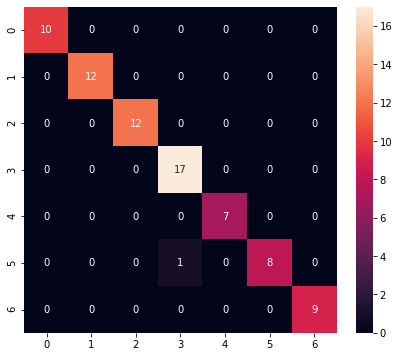

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00         7
           5       1.00      0.89      0.94         9
           6       1.00      1.00      1.00         9

    accuracy                           0.99        76
   macro avg       0.99      0.98      0.99        76
weighted avg       0.99      0.99      0.99        76



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kibas\AppData\Local\Temp\tmpxm1gk0yq\assets


6496

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 997 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9625884e-01 1.4632189e-03 4.7343706e-06 1.8210030e-01 1.6226288e-05
 6.2000424e-01 1.5247513e-04]
5
